# Lab 1: Introduction to ML - Solutions

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as ss

import math
import seaborn as sns

# plotting
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import spearmanr

from sklearn.feature_selection import mutual_info_classif # used for classification task

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

### Correlation between variables

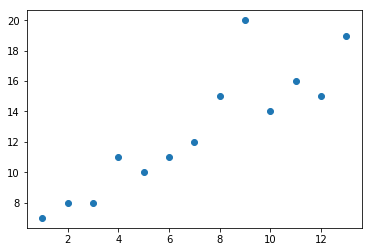

In [2]:
#Create two random variable 
X = [1,2,3,4,5,6,7,8,9,10,11,12,13]
Y = [7,8,8,11,10,11,12,15,20,14,16,15,19]

#plot the variables to show linearity
plt.scatter(X,Y)
# plt.scatter(X,list(reversed(Y)))
plt.show()

In [3]:
# create a dataframe from X and Y vectors
df_xy = pd.DataFrame({
    'X': X,
    'Y': Y
})
df_xy

,X,Y
0,1,7
1,2,8
2,3,8
3,4,11
4,5,10
5,6,11
6,7,12
7,8,15
8,9,20
9,10,14


In [4]:
# use pandas functions to calculate pearson correlation
df_xy.corr('pearson')

,X,Y
X,1.000000,0.887636
Y,0.887636,1.000000


In [5]:
# use pandas functions to calculate spearman correlation
df_xy.corr('spearman')

,X,Y
X,1.000000,0.907594
Y,0.907594,1.000000


### Experimenting with actual data set

In [6]:
# read data
df_lp = pd.read_csv('LoanPrediction_train.csv')
# print out first 5 rows of data
df_lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# summarize information from data
df_lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# convert categorical variables to numericals
df_lp['Married'] =df_lp['Married'].astype('category').cat.codes
df_lp['Gender'] =df_lp['Gender'].astype('category').cat.codes
df_lp['Loan_ID'] =df_lp['Loan_ID'].astype('category').cat.codes
df_lp['Dependents'] =df_lp['Dependents'].astype('category').cat.codes
df_lp['Education'] =df_lp['Education'].astype('category').cat.codes
df_lp['Self_Employed'] =df_lp['Self_Employed'].astype('category').cat.codes
df_lp['Property_Area'] =df_lp['Property_Area'].astype('category').cat.codes
df_lp['Loan_Status'] =df_lp['Loan_Status'].astype('category').cat.codes

#handle missing values in the data set
df_lp['Gender'].fillna(df_lp['Gender'].mode()[0], inplace=True)
df_lp['Married'].fillna(df_lp['Married'].mode()[0], inplace=True)
df_lp['Dependents'].fillna(df_lp['Dependents'].mode()[0], inplace=True)
df_lp['LoanAmount'].fillna(df_lp['LoanAmount'].mode()[0], inplace=True)
df_lp['Loan_Amount_Term'].fillna(df_lp['Loan_Amount_Term'].mode()[0], inplace=True)
df_lp['Credit_History'].fillna(df_lp['Credit_History'].mode()[0], inplace=True)

df_lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [9]:
df_lp.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.775244,0.643322,0.719870,0.218241,0.081433,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.465767,0.489511,1.039056,0.413389,0.423472,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### operations over columns of the dataset

In [10]:
np.mean(df_lp["ApplicantIncome"])

5403.459283387622

In [11]:
# correlation plot over select subsets of the columns
numeric_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
target_column = ["Loan_Status"] # may be considered as an ordinal variable
subset_columns = numeric_columns + target_column 

# print out the correlation matrix
df_lp[subset_columns].corr("spearman")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.320056,0.501755,-0.040292,0.037180,-0.004162
CoapplicantIncome,-0.320056,1.000000,0.238332,-0.012435,0.001271,0.034960
LoanAmount,0.501755,0.238332,1.000000,0.038515,0.001984,-0.029271
Loan_Amount_Term,-0.040292,-0.012435,0.038515,1.000000,0.007093,-0.027664
Credit_History,0.037180,0.001271,0.001984,0.007093,1.000000,0.540556
Loan_Status,-0.004162,0.034960,-0.029271,-0.027664,0.540556,1.000000


In [12]:
# color coded correlation matrix
df_lp[subset_columns].corr("spearman").style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1,-0.320056,0.501755,-0.0402919,0.0371803,-0.00416234
CoapplicantIncome,-0.320056,1,0.238332,-0.0124349,0.00127081,0.0349596
LoanAmount,0.501755,0.238332,1,0.0385149,0.00198406,-0.0292713
Loan_Amount_Term,-0.0402919,-0.0124349,0.0385149,1,0.00709284,-0.0276636
Credit_History,0.0371803,0.00127081,0.00198406,0.00709284,1,0.540556
Loan_Status,-0.00416234,0.0349596,-0.0292713,-0.0276636,0.540556,1


In [13]:
# for a categorical variable, frequency of outcomes
df_lp["Property_Area"].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [14]:
# for a categorical variable, relative frequency
df_lp.groupby("Property_Area")['Loan_Status'].value_counts()

Property_Area  Loan_Status
0              1              110
               0               69
1              1              179
               0               54
2              1              133
               0               69
Name: Loan_Status, dtype: int64

### Probability calculations

In [15]:
# marginal probability distribution
marginal_credHistory_probs = df_lp.groupby("Credit_History").size().div(len(df_lp))

In [16]:
# conditional probability distribution
df_condProb_cs = df_lp.groupby('Credit_History')['Loan_Status'].value_counts() / df_lp.groupby('Credit_History')['Loan_Status'].count()
df_condProb_cs

Credit_History  Loan_Status
0.0             0              0.921348
                1              0.078652
1.0             1              0.790476
                0              0.209524
Name: Loan_Status, dtype: float64

In [17]:
joint_prob = {}
for c in range(2):
    for s in range(2):
        joint_prob[c,s] = np.round(df_condProb_cs[c,s]*marginal_credHistory_probs[c],3)
joint_prob

{(0, 0): 0.134, (0, 1): 0.011, (1, 0): 0.179, (1, 1): 0.676}

In [18]:
# sklearn function to calculate the mutual information between the features in the data set and target variable
mutual_info_classif(df_lp.drop("Loan_Status", axis=1),df_lp["Loan_Status"]) # random_state = 1

array([1.82262837e-03, 0.00000000e+00, 2.48526874e-03, 1.39523642e-02,
       0.00000000e+00, 3.18146899e-02, 4.17465837e-03, 9.18021150e-05,
       0.00000000e+00, 6.15686030e-03, 1.09684549e-01, 3.90114394e-02])

### Clustering of the data points

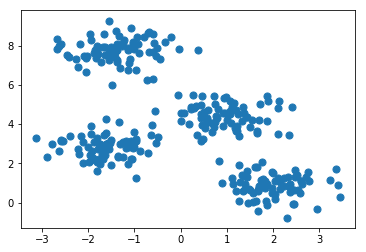

In [19]:
from sklearn.datasets.samples_generator import make_blobs

# generate data points with cluster ids y_ctrue
X_blobs, y_ctrue = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# plot the data points
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50);

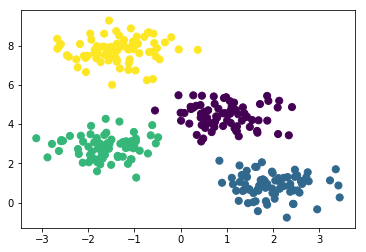

In [20]:
# color code the clusters
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_ctrue, s=50);

### Exercises

#### Pearson Correlation

Implement a function based on the description of the Pearson correlation provided in Lab1_notes.pdf that returns the pearson correlation between two given variables in the data set df_lp. Provide a table that compares the results with the pandas pearson correlation function. 

In [21]:
import math # for sqrt function

def GetCorrelation_pearson(gvx, gvy):
    t_dxMean = np.mean(gvx)
    t_dyMean = np.mean(gvy)
    
    t_dNominator = 0
    for i in range(len(gvx)):
        t_dNominator += (gvx[i]-t_dxMean)*(gvy[i]-t_dyMean)
    
    t_dDenominator_x = 0
    for i in range(len(gvx)):
        t_dDenominator_x += (gvx[i]-t_dxMean)*(gvx[i]-t_dxMean)
    t_dDenominator_x = math.sqrt(t_dDenominator_x)
    
    t_dDenominator_y = 0
    for i in range(len(gvx)):
        t_dDenominator_y += (gvy[i]-t_dyMean)*(gvy[i]-t_dyMean)
    t_dDenominator_y = math.sqrt(t_dDenominator_y)
    
    return t_dNominator/(t_dDenominator_x*t_dDenominator_y)

In [22]:
GetCorrelation_pearson(df_xy.X,df_xy.Y)

0.8876362751857731

In [23]:
GetCorrelation_pearson(df_lp["Credit_History"],df_lp["Loan_Status"])

0.5405560719222444

In [24]:
GetCorrelation_pearson(df_lp["Credit_History"],df_lp["Loan_Status"])

0.5405560719222444

In [25]:
df_lp.corr("pearson")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.056370,-0.009854,0.047757,0.039442,0.036461,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.056370,1.000000,0.277459,0.109018,0.068774,-0.031116,-0.024689,0.073642,0.020066,-0.060198,0.029789,-0.008142,0.029040
Married,-0.009854,0.277459,1.000000,0.345269,0.022530,0.030171,0.047691,0.083270,0.142161,-0.103662,0.002419,-0.003370,0.075547
Dependents,0.047757,0.109018,0.345269,1.000000,0.051414,0.048221,0.115686,0.033955,0.163491,-0.105889,-0.026431,-0.009085,0.014263
Education,0.039442,0.068774,0.022530,0.051414,1.000000,0.000820,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.036461,-0.031116,0.030171,0.048221,0.000820,1.000000,0.092967,-0.052384,0.081900,-0.017729,-0.041027,-0.028730,-0.011332
ApplicantIncome,0.016925,-0.024689,0.047691,0.115686,-0.140760,0.092967,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073642,0.083270,0.033955,-0.062290,-0.052384,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.020066,0.142161,0.163491,-0.169436,0.081900,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.060198,-0.103662,-0.105889,-0.073928,-0.017729,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


In [26]:
df_lp.corr("pearson").style.background_gradient(cmap='coolwarm')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1,-0.0563697,-0.00985352,0.0477575,0.039442,0.0364615,0.0169252,0.0392111,0.0373689,-0.0330282,-0.0306028,-0.155416,0.0117734
Gender,-0.0563697,1,0.277459,0.109018,0.0687736,-0.0311164,-0.0246893,0.0736418,0.0200658,-0.0601979,0.0297893,-0.00814194,0.0290395
Married,-0.00985352,0.277459,1,0.345269,0.0225303,0.0301711,0.0476906,0.0832701,0.142161,-0.103662,0.00241851,-0.00337037,0.0755465
Dependents,0.0477575,0.109018,0.345269,1,0.0514137,0.0482211,0.115686,0.033955,0.163491,-0.105889,-0.0264309,-0.0090853,0.0142628
Education,0.039442,0.0687736,0.0225303,0.0514137,1,0.000819562,-0.14076,-0.0622898,-0.169436,-0.0739279,-0.0736578,-0.0652433,-0.0858839
Self_Employed,0.0364615,-0.0311164,0.0301711,0.0482211,0.000819562,1,0.0929674,-0.0523845,0.0819,-0.0177293,-0.0410269,-0.0287297,-0.0113318
ApplicantIncome,0.0169252,-0.0246893,0.0476906,0.115686,-0.14076,0.0929674,1,-0.116605,0.564698,-0.0465311,-0.0186154,-0.00949969,-0.00470952
CoapplicantIncome,0.0392111,0.0736418,0.0832701,0.033955,-0.0622898,-0.0523845,-0.116605,1,0.189723,-0.0593831,0.0111339,0.0105219,-0.0591873
LoanAmount,0.0373689,0.0200658,0.142161,0.163491,-0.169436,0.0819,0.564698,0.189723,1,0.0371517,-0.00024992,-0.0474135,-0.0318084
Loan_Amount_Term,-0.0330282,-0.0601979,-0.103662,-0.105889,-0.0739279,-0.0177293,-0.0465311,-0.0593831,0.0371517,1,-0.00470498,-0.07612,-0.022549


In [27]:
df_lp.corr("pearson").style.background_gradient()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1,-0.0563697,-0.00985352,0.0477575,0.039442,0.0364615,0.0169252,0.0392111,0.0373689,-0.0330282,-0.0306028,-0.155416,0.0117734
Gender,-0.0563697,1,0.277459,0.109018,0.0687736,-0.0311164,-0.0246893,0.0736418,0.0200658,-0.0601979,0.0297893,-0.00814194,0.0290395
Married,-0.00985352,0.277459,1,0.345269,0.0225303,0.0301711,0.0476906,0.0832701,0.142161,-0.103662,0.00241851,-0.00337037,0.0755465
Dependents,0.0477575,0.109018,0.345269,1,0.0514137,0.0482211,0.115686,0.033955,0.163491,-0.105889,-0.0264309,-0.0090853,0.0142628
Education,0.039442,0.0687736,0.0225303,0.0514137,1,0.000819562,-0.14076,-0.0622898,-0.169436,-0.0739279,-0.0736578,-0.0652433,-0.0858839
Self_Employed,0.0364615,-0.0311164,0.0301711,0.0482211,0.000819562,1,0.0929674,-0.0523845,0.0819,-0.0177293,-0.0410269,-0.0287297,-0.0113318
ApplicantIncome,0.0169252,-0.0246893,0.0476906,0.115686,-0.14076,0.0929674,1,-0.116605,0.564698,-0.0465311,-0.0186154,-0.00949969,-0.00470952
CoapplicantIncome,0.0392111,0.0736418,0.0832701,0.033955,-0.0622898,-0.0523845,-0.116605,1,0.189723,-0.0593831,0.0111339,0.0105219,-0.0591873
LoanAmount,0.0373689,0.0200658,0.142161,0.163491,-0.169436,0.0819,0.564698,0.189723,1,0.0371517,-0.00024992,-0.0474135,-0.0318084
Loan_Amount_Term,-0.0330282,-0.0601979,-0.103662,-0.105889,-0.0739279,-0.0177293,-0.0465311,-0.0593831,0.0371517,1,-0.00470498,-0.07612,-0.022549


[Text(0.5,0,'Loan_ID'),
 Text(1.5,0,'Gender'),
 Text(2.5,0,'Married'),
 Text(3.5,0,'Dependents'),
 Text(4.5,0,'Education'),
 Text(5.5,0,'Self_Employed'),
 Text(6.5,0,'ApplicantIncome'),
 Text(7.5,0,'CoapplicantIncome'),
 Text(8.5,0,'LoanAmount'),
 Text(9.5,0,'Loan_Amount_Term'),
 Text(10.5,0,'Credit_History'),
 Text(11.5,0,'Property_Area'),
 Text(12.5,0,'Loan_Status')]

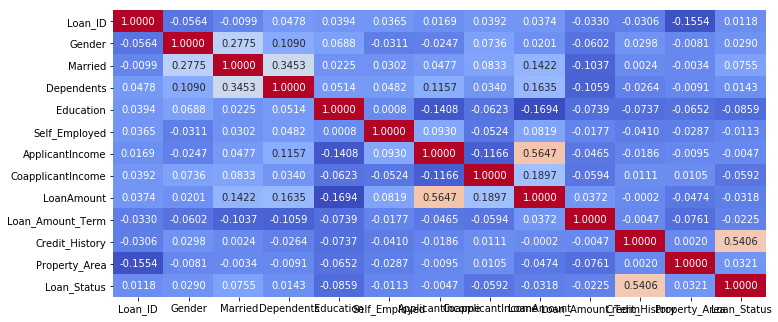

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.27)
sns.heatmap(df_lp.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal")
#plt.savefig('outfiles/lp_pearson_correlation.png', bbox_inches='tight', pad_inches=0.0)

### Spearman Correlation

Implement a function based on the description of the Spearman correlation provided in Lab1_notes.pdf that returns the spearman correlation between two given variables in the data set df_lp. Provide a table that compares the results with the pandas spearman correlation function. 

In [29]:
# you can use scipy.stats function rankdata() to rank the values in a given vector
def GetCorrelation_spearman(gvx, gvy):
    t_vRank_x = ss.rankdata(gvx)
    t_vRank_y = ss.rankdata(gvy)
    t_vd = t_vRank_x - t_vRank_y
    t_dNominator = 6*sum([d**2 for d in t_vd])
    t_dDenominator = len(gvx)*(len(gvx)**2-1)
    return 1-(t_dNominator/t_dDenominator)
    

In [30]:
GetCorrelation_spearman(X,Y)

0.907967032967033

In [31]:
GetCorrelation_spearman(df_lp["Credit_History"],df_lp["Loan_Status"])

0.7563800580909561

In [32]:
df_lp.corr("spearman")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.048819,-0.011915,0.051586,0.039442,0.036564,0.008849,-0.025822,0.028876,-0.029617,-0.030603,-0.155225,0.011773
Gender,-0.048819,1.000000,0.327402,0.137596,0.063703,-0.014842,0.060637,0.193804,0.117075,-0.072392,0.023707,-0.013211,0.026465
Married,-0.011915,0.327402,1.000000,0.357205,0.019461,0.028345,-0.000039,0.276393,0.183373,-0.122182,0.005168,-0.000919,0.081335
Dependents,0.051586,0.137596,0.357205,1.000000,0.043806,0.058607,0.128620,-0.030786,0.144083,-0.123586,-0.016051,0.009898,0.013959
Education,0.039442,0.063703,0.019461,0.043806,1.000000,0.000033,-0.189536,-0.011973,-0.163954,-0.070937,-0.073658,-0.064534,-0.085884
Self_Employed,0.036564,-0.014842,0.028345,0.058607,0.000033,1.000000,0.177582,-0.061802,0.089736,-0.024851,-0.038628,-0.029527,-0.010901
ApplicantIncome,0.008849,0.060637,-0.000039,0.128620,-0.189536,0.177582,1.000000,-0.320056,0.501755,-0.040292,0.037180,-0.067188,-0.004162
CoapplicantIncome,-0.025822,0.193804,0.276393,-0.030786,-0.011973,-0.061802,-0.320056,1.000000,0.238332,-0.012435,0.001271,-0.075993,0.034960
LoanAmount,0.028876,0.117075,0.183373,0.144083,-0.163954,0.089736,0.501755,0.238332,1.000000,0.038515,0.001984,-0.111242,-0.029271
Loan_Amount_Term,-0.029617,-0.072392,-0.122182,-0.123586,-0.070937,-0.024851,-0.040292,-0.012435,0.038515,1.000000,0.007093,-0.061441,-0.027664


In [33]:
df_lp.corr("spearman").style.background_gradient(cmap='coolwarm')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1,-0.0488192,-0.0119154,0.0515859,0.039442,0.0365639,0.00884882,-0.0258215,0.0288762,-0.029617,-0.0306028,-0.155225,0.0117734
Gender,-0.0488192,1,0.327402,0.137596,0.0637032,-0.0148418,0.0606366,0.193804,0.117075,-0.0723918,0.0237066,-0.0132109,0.0264653
Married,-0.0119154,0.327402,1,0.357205,0.0194608,0.0283447,-3.88099e-05,0.276393,0.183373,-0.122182,0.00516849,-0.000918705,0.0813345
Dependents,0.0515859,0.137596,0.357205,1,0.0438057,0.0586073,0.12862,-0.0307861,0.144083,-0.123586,-0.0160513,0.00989832,0.0139589
Education,0.039442,0.0637032,0.0194608,0.0438057,1,3.28906e-05,-0.189536,-0.0119727,-0.163954,-0.0709371,-0.0736578,-0.0645341,-0.0858839
Self_Employed,0.0365639,-0.0148418,0.0283447,0.0586073,3.28906e-05,1,0.177582,-0.0618022,0.0897356,-0.0248514,-0.0386281,-0.0295273,-0.0109014
ApplicantIncome,0.00884882,0.0606366,-3.88099e-05,0.12862,-0.189536,0.177582,1,-0.320056,0.501755,-0.0402919,0.0371803,-0.0671884,-0.00416234
CoapplicantIncome,-0.0258215,0.193804,0.276393,-0.0307861,-0.0119727,-0.0618022,-0.320056,1,0.238332,-0.0124349,0.00127081,-0.0759929,0.0349596
LoanAmount,0.0288762,0.117075,0.183373,0.144083,-0.163954,0.0897356,0.501755,0.238332,1,0.0385149,0.00198406,-0.111242,-0.0292713
Loan_Amount_Term,-0.029617,-0.0723918,-0.122182,-0.123586,-0.0709371,-0.0248514,-0.0402919,-0.0124349,0.0385149,1,0.00709284,-0.0614413,-0.0276636


[Text(0.5,0,'Loan_ID'),
 Text(1.5,0,'Gender'),
 Text(2.5,0,'Married'),
 Text(3.5,0,'Dependents'),
 Text(4.5,0,'Education'),
 Text(5.5,0,'Self_Employed'),
 Text(6.5,0,'ApplicantIncome'),
 Text(7.5,0,'CoapplicantIncome'),
 Text(8.5,0,'LoanAmount'),
 Text(9.5,0,'Loan_Amount_Term'),
 Text(10.5,0,'Credit_History'),
 Text(11.5,0,'Property_Area'),
 Text(12.5,0,'Loan_Status')]

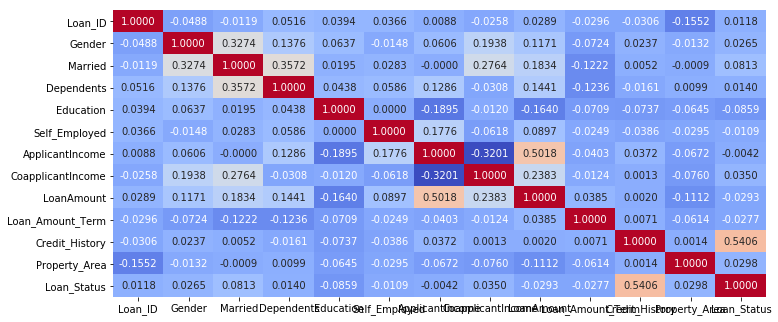

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 5.27)
sns.heatmap(df_lp.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal")
#plt.savefig('outfiles/lp_spearman_correlation.png', bbox_inches='tight', pad_inches=0.0)

### Mutual Info calculations

Implement a function based on the description of the Mutual Information provided in Lab1_notes.pdf that returns the mutual information between two given variables in the data set df_lp. Provide a table that compares the results with the sklearn mutual information function.

In [35]:
def GetMutualInfo(gdf, sCol1, sCol2):
    
    v_uniqueVals_col1 = gdf[sCol1].unique()
    v_uniqueVals_col2 = gdf[sCol2].unique()
    
    #print(v_uniqueVals_col1)
    #print(v_uniqueVals_col2)
    
    marginal1 = gdf.groupby(sCol1).size().div(len(gdf))
    marginal2 = gdf.groupby(sCol2).size().div(len(gdf))
    
    #print(marginal1)
    #print(marginal2)
    
    df_condProb = gdf.groupby(sCol1)[sCol2].value_counts() / gdf.groupby(sCol1)[sCol2].count()
    
    #print(df_condProb)
    #print(df_condProb[2,0])
    
    cond_prob = {}
    for i in v_uniqueVals_col1:
        for j in v_uniqueVals_col2:
            if (i,j) in df_condProb.index:
                cond_prob[i,j] = df_condProb[i,j]
            else:
                cond_prob[i,j] = 0
    
    joint_prob = {}
    for i in v_uniqueVals_col1:
        for j in v_uniqueVals_col2:
            joint_prob[i,j] = np.round(cond_prob[i,j]*marginal1[i],3)
    
    tmp_mutualInfo = 0
    for i in v_uniqueVals_col1:
        for j in v_uniqueVals_col2:
            if joint_prob[i,j] > 0:
                tmp_mutualInfo += joint_prob[i,j]*math.log(joint_prob[i,j]/(marginal1[i]*marginal2[j]))
    
    return givenDec3(tmp_mutualInfo)

In [36]:
GetMutualInfo(df_lp, "Credit_History", "Loan_Status")

0.144

In [37]:
for feat in df_lp.columns:
    if feat != "Loan_Status":
        print(GetMutualInfo(df_lp, feat, "Loan_Status"))

1.015
-0.001
0.006
0.004
0.005
0.0
0.81
0.446
0.277
0.013
0.144
0.01


In [38]:
mutual_info_classif(df_lp.drop("Loan_Status", axis=1),df_lp["Loan_Status"]) # random_state = 1

array([0.00170521, 0.0038171 , 0.01090886, 0.        , 0.01928023,
       0.        , 0.00745576, 0.        , 0.        , 0.        ,
       0.14399332, 0.01072816])

### Clustering over pandas dataframe

Provide scatter plots of various pairs of columns in df_lp dataframe by using different categorical features as the cluster id's. Do these scatter plots show any meaningful patterns? 

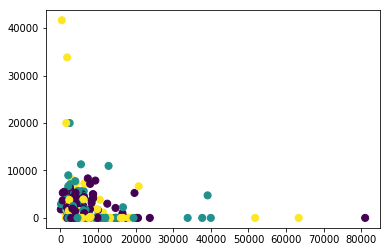

In [39]:
plt.scatter(df_lp["ApplicantIncome"], df_lp["CoapplicantIncome"], c=df_lp["Property_Area"], s=50);

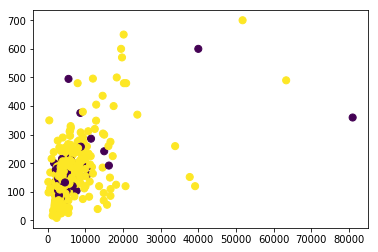

In [40]:
plt.scatter(df_lp["ApplicantIncome"], df_lp["LoanAmount"], c=df_lp["Credit_History"], s=50);

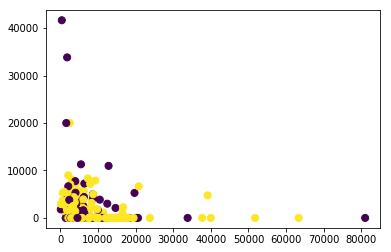

In [41]:
plt.scatter(df_lp["ApplicantIncome"], df_lp["CoapplicantIncome"], c=df_lp["Loan_Status"], s=50);